In [1]:
from netCDF4 import Dataset

dataset= Dataset('/home/jovyan/trim-test_1.nc', 'r', format='NETCDF4_CLASSIC')

In [2]:
import ipywidgets as widgets
from IPython.display import display,clear_output
import matplotlib.pyplot as plt
from ipywidgets import Layout, VBox, HBox
import numpy as np 
import datetime

In [3]:
lista=[[],[],[]]
for n in dataset.variables.keys():
    dimensiones=''
    for i in dataset.variables[n].dimensions:
        dimensiones= dimensiones+" "+i
    lista[0]= np.append(lista[0],n)
    lista[1]= np.append(lista[1],len(dataset.variables[n].dimensions))
    lista[2]= np.append(lista[2],dimensiones)
    

In [4]:
dependencias=[]
for n in lista[2]:
    if n not in dependencias:
        dependencias= np.append(dependencias,n)
    

In [5]:
variables_representadas=[]

In [6]:
variables_3d_coor=[]
for i in range(len(lista[0])):
    if lista[1][i]==3 and lista[0][i] not in 'MNKSRC':
        print(lista[0][i], lista[1][i], lista[2][i])
        variables_3d_coor= np.append(variables_3d_coor, lista[0][i])
        variables_representadas= np.append(variables_representadas, lista[0][i])

S1 3.0  time M N
KFU 3.0  time MC N
KFV 3.0  time M NC
TAUKSI 3.0  time MC N
TAUETA 3.0  time M NC
TAUMAX 3.0  time M N
UMNLDF 3.0  time MC N
VMNLDF 3.0  time M NC


In [7]:
variables_4d=[]
for i in range(len(lista[0])):
    if lista[1][i]==4:
        variables_4d= np.append(variables_4d, lista[0][i])
        variables_representadas= np.append(variables_representadas, lista[0][i])

In [8]:
print(variables_4d)

['U1' 'V1' 'W' 'WPHY' 'VICWW' 'DICWW' 'RICH' 'RHO' 'VICUV' 'HYDPRES']


In [9]:
for i in range(len(lista[0])):
    if lista[1][i]==4:
        print(lista[0][i], lista[1][i], lista[2][i])

U1 4.0  time KMAXOUT_RESTR MC N
V1 4.0  time KMAXOUT_RESTR M NC
W 4.0  time KMAXOUT M N
WPHY 4.0  time KMAXOUT_RESTR M N
VICWW 4.0  time KMAXOUT M N
DICWW 4.0  time KMAXOUT M N
RICH 4.0  time KMAXOUT M N
RHO 4.0  time KMAXOUT_RESTR M N
VICUV 4.0  time KMAXOUT_RESTR M N
HYDPRES 4.0  time KMAXOUT_RESTR M N


In [10]:
dataset.variables['U1'][0,0,0,0]

masked_array(data=-999.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [11]:
def humanize_time(secs):
    mins, secs = divmod(secs, 60)
    hours, mins = divmod(mins, 60)
    return '%02d:%02d:%02d' % (hours, mins, secs)

In [12]:
date=[]
for i in range(len(dataset.variables['time'])-1):
    date=np.append(date, humanize_time(dataset.variables['time'][i]))
    print(date[i])

00:00:00
06:00:00
12:00:00
18:00:00


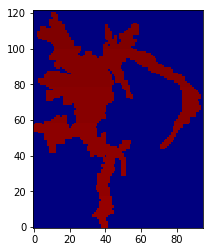

In [13]:
plt.imshow(dataset.variables['XCOR'][:,:],\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')

In [14]:
valor_x= widgets.BoundedFloatText(
    value=0,
    min=0,
    max=dataset.variables['XCOR'].shape[0]-1,
    step=1,
    description='x:'
)
valor_y= widgets.BoundedFloatText(
    value=0,
    min=0,
    max=dataset.variables['XCOR'].shape[1]-1,
    step=1,
    description='y:'
)

boton_OK= widgets.Button(
    description='OK'
)

In [15]:
drop_var=widgets.Dropdown(
    options=[(variables_representadas[n], n) for n in range(len(variables_representadas))],
    value=0,
    description='Variables:',
)

In [16]:
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='center',
                    width='100%')


vb_3d= VBox([valor_x, valor_y])
hb_3d=HBox([drop_var,vb_3d, boton_OK], layout=box_layout)

In [17]:
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(dataset.variables['KMAXOUT']),
    readout=True,
    description='Z',
    continuous_update=False

)

drop_date=widgets.Dropdown(
    options=[(str(date[i]), i) for i in range(len(date))],
    value=0,
    description='Fecha:',
)


hb_4d=HBox([drop_var, drop_date, slider], layout=box_layout)

In [18]:
hb_4d

In [19]:
propiedades=[[],[],[],[],[]]
#propiedades[var,x,y,time,z]

In [20]:
def variable_on_change(v):
    propiedades[0]=variables_representadas[v['new']]
    if(propiedades[0] in variables_3d_coor):
        actualiza_display_3d()
        
    if(propiedades[0] in variables_4d):
        actualiza_display_4d()
        
    
drop_var.observe(variable_on_change, names='value')

In [21]:
def pinta_3d():
    pinta_plot()
    actualiza_display_3d()
    

In [22]:
def pinta_4d():
    actualiza_display_4d()

In [23]:
def actualiza_display_3d():
    clear_output(wait=False)
    display(hb_3d)  
    pinta_plot()
    plt.show()

In [24]:
def actualiza_display_4d():
    clear_output(wait=False)
    display(hb_4d)  
    pinta_mapa()

In [25]:

def pinta_plot():

    plt.clf()
    axs = plt.subplot()
    eje_x=[date[i] for i in range(len(dataset.variables['time'])-1)]
    eje_y=[dataset.variables[propiedades[0]][i,propiedades[1],propiedades[2]] for i in range(len(dataset.variables[propiedades[0]])-1)]
    
    axs.plot(eje_x,eje_y)
    axs.set_title(propiedades[0])
    #axs.set_xlabel('time')
    #axs.set_ylabel('m')

In [26]:
def pinta_mapa():
    
    fig,(ax1)= plt.subplots(figsize=(13,3), ncols=1)
    im=plt.imshow(np.transpose(dataset.variables[propiedades[0]][propiedades[3],propiedades[4],:,:]),\
        cmap= plt.get_cmap('jet'), aspect='equal', origin='lower')
    plt.colorbar(im,ax=ax1)
    plt.title(propiedades[0]+" of lake")
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.show()
    
    

In [27]:
def on_button_clicked(b):
       
    propiedades[1]=valor_x.value
    propiedades[2]=valor_y.value

    pinta_plot()
    actualiza_display_3d()


boton_OK.on_click(on_button_clicked)

In [28]:
def slider_on_change(v):
    propiedades[4]=v['new']
    actualiza_display_4d()
    
slider.observe(slider_on_change, names='value')

In [29]:
def date_on_change(v):
    propiedades[3]=v['new']
    actualiza_display_4d()
    
drop_date.observe(date_on_change, names='value')

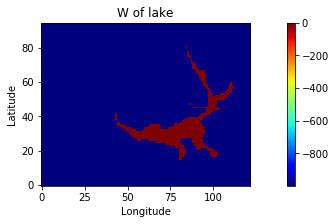

In [30]:
propiedades[0]=variables_3d_coor[0]
propiedades[1]=valor_x.value
propiedades[2]=valor_y.value
propiedades[3]=dataset.variables['time'][0]
propiedades[4]=slider.value
actualiza_display_3d()

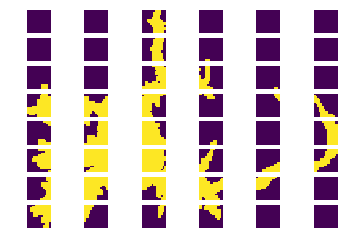

In [32]:
size_x, size_y= dataset.variables["XCOR"].shape[0], dataset.variables["XCOR"].shape[1]
cuadriculas_x, cuadriculas_y= int(size_x/15), int(size_y/15)
f, axarr = plt.subplots(cuadriculas_x, cuadriculas_y)
x1,y1=0,0
x2,y2=0,0
for i in range(cuadriculas_x):
    x2=(i+1)*15
    for j in range(cuadriculas_y):
        y2=(j+1)*15
        axarr[i,j].imshow(dataset.variables["XCOR"][x1:x2,y1:y2])
        axarr[i,j].axis('off')
        y1=(j+1)*15
    x1=(i+1)*15
    y1=0
plt.show()

In [ ]:
plt.imshow(dataset.variables["XCOR"][:,:])